# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(suppress = True, linewidth = 100, precision =2)

In [3]:
df = pd.read_excel('Online Retail.xlsx')

In [169]:
df.head()

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


#### we will start with dropping duplicate values and store it in new variable called dfc

In [6]:
dfc = df.copy().drop_duplicates()

In [7]:
dfc.shape

(536641, 8)

In [8]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


#### There are missing data in the dataset. lets be more specific which columns have missing data.

In [9]:
dfc.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

#### The column "Description" and "CustomerID" have missing data

In [10]:
dfc.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

#### The no. of unique "StockCode" and "Description" are different which need attention

In [11]:
dfc.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,536641.000000,536641,536641.000000,401604.000000
mean,9.620029,2011-07-04 08:57:06.087421952,4.632656,15281.160818
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 10:52:00,1.250000,13939.000000
50%,3.000000,2011-07-19 14:04:00,2.080000,15145.000000
75%,10.000000,2011-10-18 17:05:00,4.130000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,219.130156,NaN,97.233118,1714.006089


#### The minimum value of Quantity is negative which is not possible,also the price of a product can't be negative.

In [12]:
print(dfc[dfc['Quantity'] == -80995.000000])

       InvoiceNo StockCode                  Description  Quantity  \
540422   C581484     23843  PAPER CRAFT , LITTLE BIRDIE    -80995   

               InvoiceDate  UnitPrice  CustomerID         Country  
540422 2011-12-09 09:27:00       2.08     16446.0  United Kingdom  


#### Lets see if there are any other negative value ?

In [13]:
print(dfc[dfc['Quantity'] < 0])

       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50     1

#### There are 10624 rows with negative values which can impact the analysis. Moreover the InvoiceNo. for this values starts with C.

#### Let us check if there is any relation between Invoice no starting with "C" and Quantity with negative values ?

In [14]:
print(dfc[dfc['Quantity'] < 0 & dfc['InvoiceNo'].astype(str).str.contains('C')])

       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50     1

#### Yes this is just for negative Quantity. This can mean that C stand for all those order which were either canclled or returned.

#### Any product listed for negative price

In [15]:
print(dfc[dfc['UnitPrice'] < 0])

       InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299983   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  
299983  -11062.06         NaN  United Kingdom  
299984  -11062.06         NaN  United Kingdom  


#### There are 2 products that have a negative price, also there invoice no. start with "A"

#### Lets see if there are any other product whose inVoice no. contains A

In [16]:
print(dfc[dfc['InvoiceNo'].astype(str).str.contains('A')])

       InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299982   A563185         B  Adjust bad debt         1 2011-08-12 14:50:00   
299983   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  
299982   11062.06         NaN  United Kingdom  
299983  -11062.06         NaN  United Kingdom  
299984  -11062.06         NaN  United Kingdom  


#### There are total 3 Invoice ID which contains "A"

#### As the price of the product can't be negative we will remove this rows.

In [17]:
dfc = dfc[dfc['UnitPrice'] >= 0].copy()

#### There are lot of missing vales in CustomerID column, we will replace them with "Unknown"

In [18]:
dfc['CustomerID'].replace(np.nan,"Unknown", inplace=True)
dfc.CustomerID.isnull().sum()

0

#### Working with null values in Description column.

In [19]:
rows_with_null_description = df[df['Description'].isnull()]
print(rows_with_null_description)

       InvoiceNo StockCode Description  Quantity         InvoiceDate  \
622       536414     22139         NaN        56 2010-12-01 11:52:00   
1970      536545     21134         NaN         1 2010-12-01 14:32:00   
1971      536546     22145         NaN         1 2010-12-01 14:33:00   
1972      536547     37509         NaN         1 2010-12-01 14:33:00   
1987      536549    85226A         NaN         1 2010-12-01 14:34:00   
...          ...       ...         ...       ...                 ...   
535322    581199     84581         NaN        -2 2011-12-07 18:26:00   
535326    581203     23406         NaN        15 2011-12-07 18:31:00   
535332    581209     21620         NaN         6 2011-12-07 18:35:00   
536981    581234     72817         NaN        27 2011-12-08 10:33:00   
538554    581408     85175         NaN        20 2011-12-08 14:06:00   

        UnitPrice  CustomerID         Country  
622           0.0         NaN  United Kingdom  
1970          0.0         NaN  United K

#### There are 1454 rows with null value. we can delete these rows.

In [20]:
dfc = dfc.dropna(subset=['Description'])

#### We will extract Month and Day from "InvoiceDate"

In [21]:
dfc['InvoiceDate'] = pd.to_datetime(dfc['InvoiceDate'])

In [22]:
dfc['Purchase_Month'] = dfc['InvoiceDate'].dt.strftime('%Y-%m')

In [23]:
dfc['Day_of_Purchase']= dfc['InvoiceDate'].dt.day_name()

In [24]:
print(dfc['Day_of_Purchase'].unique())

['Wednesday' 'Thursday' 'Friday' 'Sunday' 'Monday' 'Tuesday']


#### The column "InvoiceDate" is of no use now so, we can delete it

In [25]:
dfc = dfc.drop(columns=['InvoiceDate'])

In [26]:
dfc.isnull().sum()

InvoiceNo          0
StockCode          0
Description        0
Quantity           0
UnitPrice          0
CustomerID         0
Country            0
Purchase_Month     0
Day_of_Purchase    0
dtype: int64

#### Check for outliners

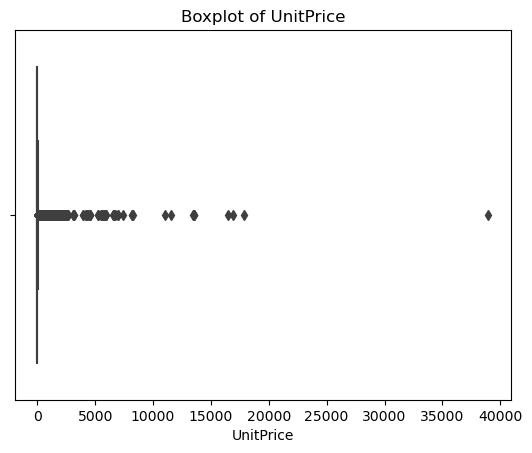

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=dfc['UnitPrice'])
plt.title('Boxplot of UnitPrice')
plt.show()

#### There are few outliner but it's ok to have them as the price can vary product to product.

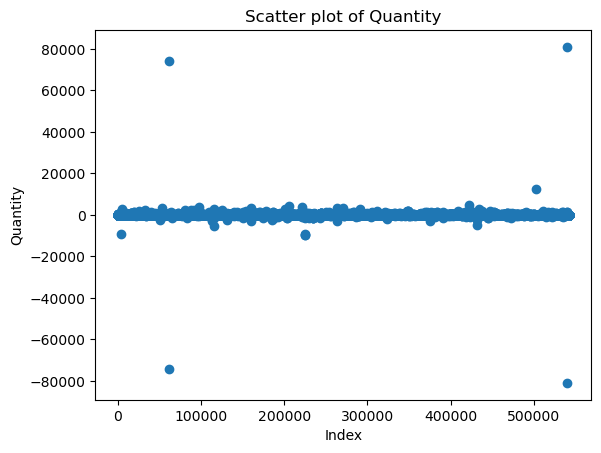

In [28]:
plt.scatter(dfc.index, dfc['Quantity'])
plt.title('Scatter plot of Quantity')
plt.xlabel('Index')
plt.ylabel('Quantity')
plt.show()

#### We will drop duplicates if any and save it for analysis

In [29]:
dfc= dfc.copy().drop_duplicates()

In [31]:
dfc.to_csv('Online_Retail_Cleaned.csv', index=False)

## Now let's start with the analysis

#### We will seperate the data in 2 parts. can_order(Cancelled orders) and suc_order(successful_orders)

#### Data of successful sales

In [32]:
suc_data = dfc[~dfc['InvoiceNo'].str.contains('C', na=False)].copy()
suc_data

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Purchase_Month,Day_of_Purchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12,Wednesday
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,2011-12,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,2011-12,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2011-12,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,2011-12,Friday


#### Data of cancelled or returned products

In [33]:
can_data = dfc[dfc['InvoiceNo'].str.contains('C', na=False)].copy()
can_data

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Purchase_Month,Day_of_Purchase
141,C536379,D,Discount,-1,27.50,14527.0,United Kingdom,2010-12,Wednesday
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,15311.0,United Kingdom,2010-12,Wednesday
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,17548.0,United Kingdom,2010-12,Wednesday
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,2010-12,Wednesday
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,2010-12,Wednesday
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,0.83,14397.0,United Kingdom,2011-12,Friday
541541,C581499,M,Manual,-1,224.69,15498.0,United Kingdom,2011-12,Friday
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,10.95,15311.0,United Kingdom,2011-12,Friday
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,1.25,17315.0,United Kingdom,2011-12,Friday


## Sales trend

#### Are there any seasonal patterns or trends in sales? Which  days of the week or month have the highest sales?

Purchase_Month
2011-11    1503866.780
2011-10    1151263.730
2011-09    1056431.292
2010-12     821452.730
2011-05     769296.610
2011-06     760547.010
2011-08     757841.380
2011-07     718076.121
2011-03     716215.260
2011-01     689811.610
2011-12     637790.330
2011-04     536968.491
2011-02     522545.560
dtype: float64


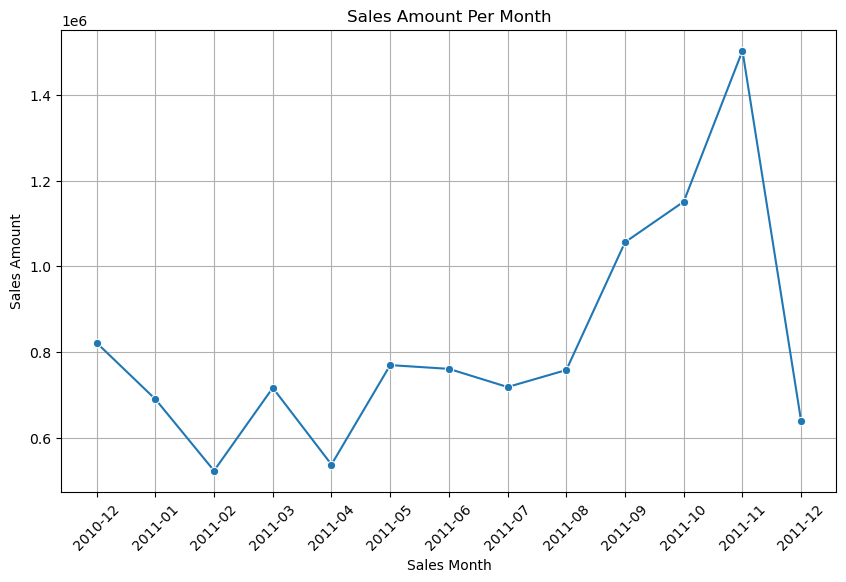

In [178]:
sales_over_time= suc_data.groupby(['Purchase_Month']).apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())
print(sales_over_time.sort_values(ascending=False))

plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_over_time, marker='o')
plt.title('Sales Amount Per Month')
plt.xlabel('Sales Month')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

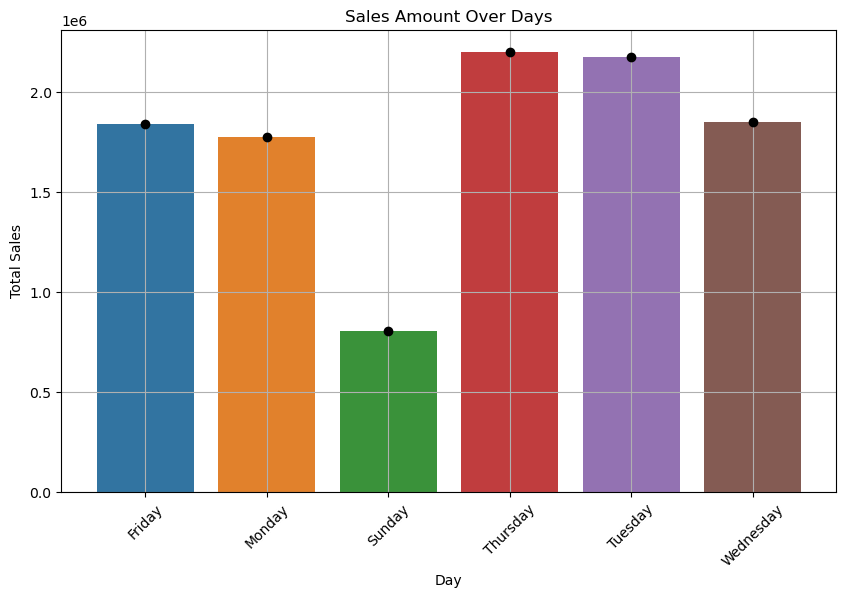

In [180]:
sales_over_week= suc_data.groupby(['Day_of_Purchase']).apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())
sales_over_week.sort_values( ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_over_week.index, y=sales_over_week.values)

for i, value in enumerate(sales_over_week.values):
    plt.plot(i, value, 'o', color='black', zorder=3)

plt.title('Sales Amount Over Days')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



## Product performance

#### Which are the best-selling products?

In [39]:
product_sales = suc_data.groupby(['StockCode', 'Description']).apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())
product_sales.sort_values( ascending=False).head(10)

StockCode  Description                       
DOT        DOTCOM POSTAGE                        206248.77
22423      REGENCY CAKESTAND 3 TIER              174156.54
23843      PAPER CRAFT , LITTLE BIRDIE           168469.60
85123A     WHITE HANGING HEART T-LIGHT HOLDER    104284.24
47566      PARTY BUNTING                          99445.23
85099B     JUMBO BAG RED RETROSPOT                94159.81
23166      MEDIUM CERAMIC TOP STORAGE JAR         81700.92
POST       POSTAGE                                78101.88
M          Manual                                 77750.27
23084      RABBIT NIGHT LIGHT                     66870.03
dtype: float64

#### Trending products each month 

In [134]:
Trending_products = suc_data.groupby([ 'Purchase_Month', 'StockCode','Description'])['Quantity'].sum().reset_index()
Trending_products['Rank'] = Trending_products.groupby(['Purchase_Month'])['Quantity'].rank(ascending=False, method='dense')
Top_5_products_per_month = Trending_products[Trending_products['Rank'] <= 5]

Top_5_products_per_month

,Purchase_Month,StockCode,Description,Quantity,Rank
327,2010-12,21212,PACK OF 72 RETROSPOT CAKE CASES,4106,2.0
962,2010-12,22197,SMALL POPCORN HOLDER,2737,5.0
1556,2010-12,22834,HAND WARMER BABUSHKA DESIGN,3476,4.0
1841,2010-12,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,5195,1.0
2549,2010-12,85123A,WHITE HANGING HEART T-LIGHT HOLDER,3753,3.0
...,...,...,...,...,...
33177,2011-12,22086,PAPER CHAIN KIT 50'S CHRISTMAS,2088,5.0
33261,2011-12,22197,POPCORN HOLDER,6217,2.0
33957,2011-12,23084,RABBIT NIGHT LIGHT,4304,3.0
34405,2011-12,23582,VINTAGE DOILY JUMBO BAG RED,2101,4.0


## Customer Behaviour

#### Who are the most valuable customers in terms of total spending or frequency of purchases?

In [182]:
customer_spending = suc_data.groupby('CustomerID')[['Quantity', 'UnitPrice']].sum()
customer_spending['total_spending'] = suc_data.groupby(['CustomerID']).apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())
customer_spending_ranked = customer_spending.sort_values(by='total_spending', ascending=False)

customer_frequency = suc_data.groupby('CustomerID')['InvoiceNo'].nunique()
customer_frequency_ranked = customer_frequency.sort_values( ascending=False)

print("Top Customers by Total Spending:")
print(customer_spending_ranked.head(10))

print("\nTop Customers by Frequency of Purchases:")
print(customer_frequency_ranked.head(10))

Top Customers by Total Spending:
            Quantity  UnitPrice  total_spending
CustomerID                                     
Unknown       285783  831350.66      1754901.91
14646.0       197491    5176.09       280206.02
18102.0        64124    1940.92       259657.30
17450.0        69973    1135.32       194390.79
16446.0        80997       4.98       168472.50
14911.0        80490   26150.35       143711.17
12415.0        77670    2097.08       124914.53
14156.0        57768    5348.73       117210.08
17511.0        64549    2221.28        91062.38
16029.0        40108    8720.65        80850.84

Top Customers by Frequency of Purchases:
CustomerID
Unknown    2072
12748.0     210
14911.0     201
17841.0     124
13089.0      97
14606.0      93
15311.0      91
12971.0      86
14646.0      74
16029.0      63
Name: InvoiceNo, dtype: int64


#### What is the average order size? Are there any differences in purchasing behavior between new and returning customers?

In [42]:
average_order_size = suc_data['Quantity'].sum() / suc_data['InvoiceNo'].nunique()
print("Average Order Size:", average_order_size)

customer_purchase_counts = suc_data.groupby('CustomerID')['InvoiceNo'].nunique()
new_customers = customer_purchase_counts[customer_purchase_counts == 1].index
returning_customers = customer_purchase_counts[customer_purchase_counts > 1].index

average_order_size_new = suc_data[suc_data['CustomerID'].isin(new_customers)]['Quantity'].sum() / len(new_customers)
average_order_size_returning = suc_data[suc_data['CustomerID'].isin(returning_customers)]['Quantity'].sum() / len(returning_customers)

print("Average Order Size for New Customers:", average_order_size_new)
print("Average Order Size for Returning Customers:", average_order_size_returning)


Average Order Size: 264.54129464285717
Average Order Size for New Customers: 278.52945113788485
Average Order Size for Returning Customers: 1769.3408292340127


## Geographic Analysis

#### How do sales vary across different regions or countries?

In [181]:
country_spending = suc_data.groupby('Country')[['Quantity', 'UnitPrice']].sum()
country_spending['Total_spending'] = suc_data.groupby(['Country']).apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())
country_spending_ranked = country_spending.sort_values(by='Total_spending', ascending=False)

country_frequency = suc_data.groupby('Country')['InvoiceNo'].nunique()
country_frequency_ranked = country_frequency.sort_values( ascending=False)

print("Top countries by Total Spending:")
print(country_spending_ranked.head(10))

print("\nTop countries by Frequency of Purchases:")
print(country_frequency_ranked.head(10))

Top countries by Total Spending:
                Quantity    UnitPrice  Total_spending
Country                                              
United Kingdom   4524977  1855249.284     9001740.194
Netherlands       200937     6247.730      285446.340
EIRE              147281    38444.380      283140.520
Germany           119156    33499.580      228678.400
France            112061    36949.730      209625.370
Australia          84199     3605.750      138453.810
Spain              27944     9492.390       61558.560
Switzerland        30618     6616.260       57067.600
Belgium            23237     7372.850       41196.340
Sweden             36078     1693.690       38367.830

Top countries by Frequency of Purchases:
Country
United Kingdom    18666
Germany             457
France              392
EIRE                288
Belgium              98
Netherlands          95
Spain                90
Portugal             58
Australia            57
Switzerland          54
Name: InvoiceNo, dtype: int64

## Customer Retention and Loyalty

#### For this analysis we have considered only those customers whose CustomerID is known

Purchase_Month
2010-12    0.203964
2011-01    0.170777
2011-02    0.174695
2011-03    0.224476
2011-04    0.197280
2011-05    0.243374
2011-06    0.228394
2011-07    0.218714
2011-08    0.215487
2011-09    0.291772
2011-10    0.314358
2011-11    0.383729
2011-12    0.141738
Name: CustomerID, dtype: float64


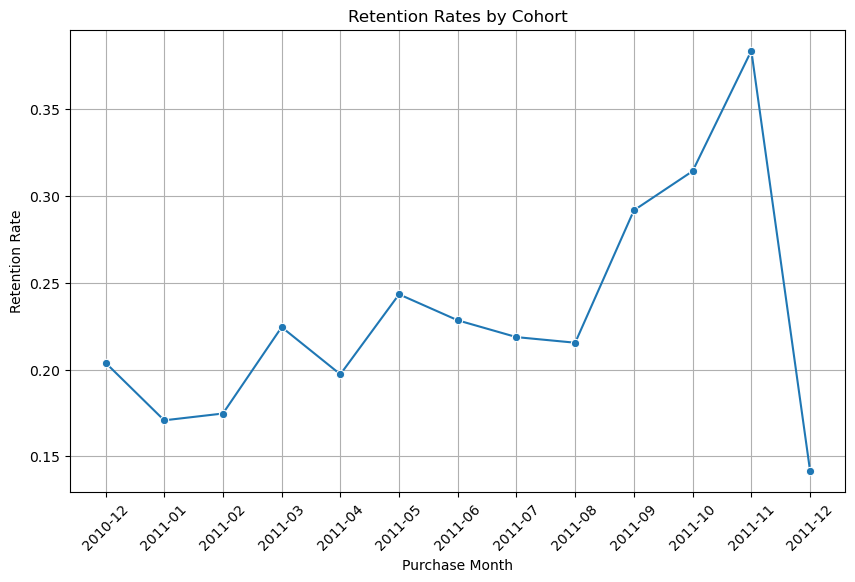

In [183]:
ret_data = suc_data[suc_data['CustomerID'] != 'Unknown']
retention_rates = ret_data.groupby('Purchase_Month')['CustomerID'].apply(lambda x: len(set(x)) / len(set(ret_data['CustomerID'])))
print(retention_rates)

plt.figure(figsize=(10, 6))
sns.lineplot(data=retention_rates, marker='o')
plt.title('Retention Rates by Cohort')
plt.xlabel('Purchase Month')
plt.ylabel('Retention Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
                                                                         

## Price analysis

#### What is the distribution of unit prices for products?

Summary Statistics of Unit Prices:
count    525933.000000
mean          3.914700
std          36.057236
min           0.000000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64


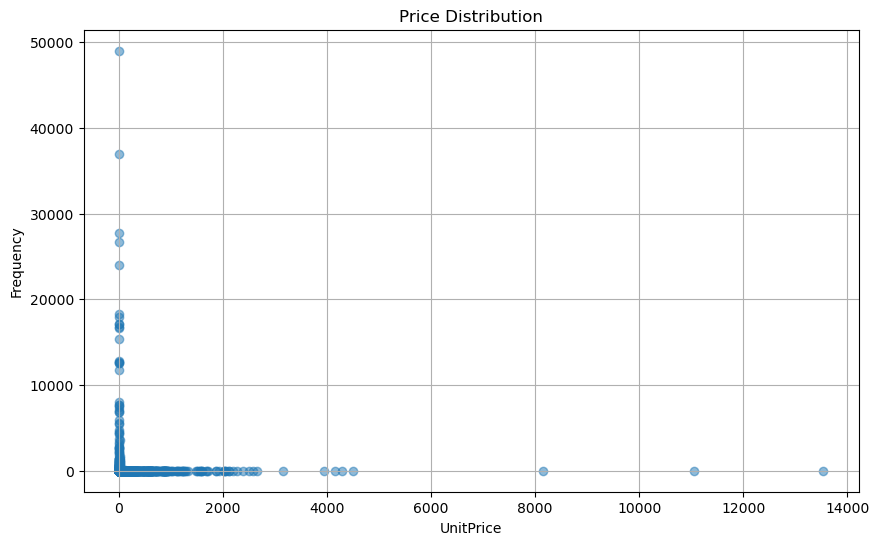

In [118]:

unit_price_stats = suc_data['UnitPrice'].describe()
print("Summary Statistics of Unit Prices:")
print(unit_price_stats)

unit_price_frequency = suc_data['UnitPrice'].value_counts()

plt.figure(figsize=(10, 6))
plt.scatter(unit_price_frequency.index, unit_price_frequency.values, alpha=0.5)
plt.title('Price Distribution')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Analyzing cancelled orders and it's impact.

#### what's the impact of cancelled orders on overall sales?

In [60]:
total_cancelled_amount = (can_data['UnitPrice'] * can_data['Quantity']).sum()
print("Overall loss: ",total_cancelled_amount)

Overall loss:  -893979.7300000001


#### Comparision of successful orders and cancelled orders

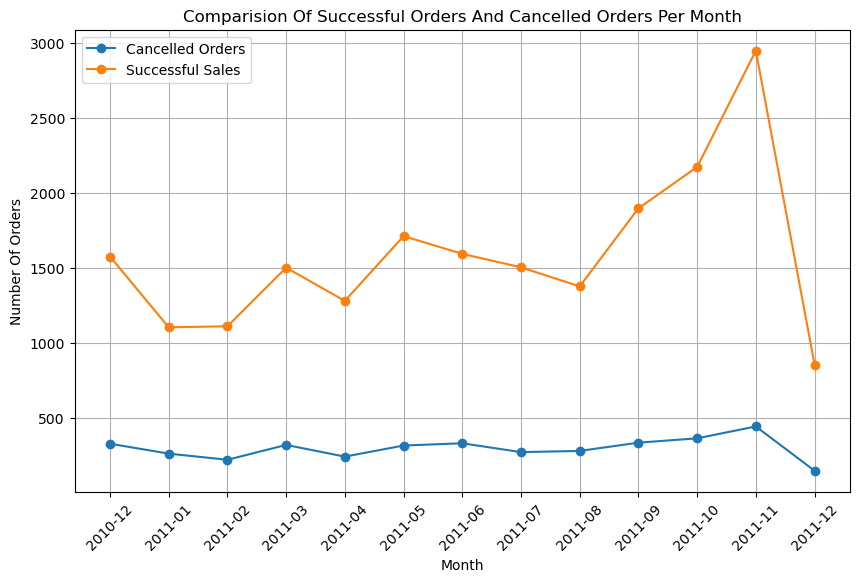

In [145]:
Can_per_month = can_data.groupby('Purchase_Month')['InvoiceNo'].nunique()
sales_per_month = suc_data.groupby('Purchase_Month')['InvoiceNo'].nunique()

plt.figure(figsize=(10, 6))
plt.plot(Can_per_month.index, Can_per_month.values, label='Cancelled Orders',marker='o')
plt.plot(sales_per_month.index, sales_per_month.values, label='Successful Sales', marker='o')
plt.xlabel('Month')
plt.ylabel('Number Of Orders')
plt.xticks(rotation=45)
plt.title('Comparision Of Successful Orders And Cancelled Orders Per Month')
plt.legend()
plt.grid(True)
plt.show()

#### Revenue lost due to cancelled orders

In [85]:
can_over_time= can_data.groupby(['Purchase_Month']).apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())

Purchase_Month
2010-12    -74729.12
2011-01   -131363.05
2011-02    -25519.15
2011-03    -34201.28
2011-04    -44600.65
2011-05    -47202.51
2011-06    -70569.78
2011-07    -37919.13
2011-08    -54330.80
2011-09    -38838.51
2011-10    -81895.50
2011-11    -47720.98
2011-12   -205089.27
dtype: float64

#### Comparision of Expected sales and actual sales

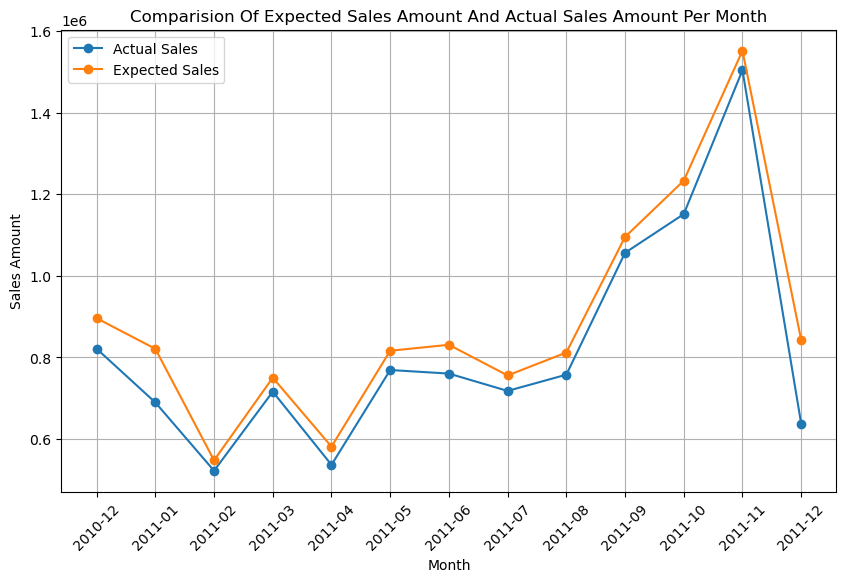

In [146]:
df1 = pd.DataFrame(sales_over_time)
df2 = pd.DataFrame(can_over_time)
df3 = df1 - df2

plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1.values, label='Actual Sales',marker='o')
plt.plot(df3.index, df3.values, label='Expected Sales', marker='o')

plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.title('Comparision Of Expected Sales Amount And Actual Sales Amount Per Month')
plt.grid(True)
plt.legend()
plt.show()

#### No. of Cancelled orders by day

Day_of_Purchase
Friday       551
Monday       718
Sunday       174
Thursday     971
Tuesday      749
Wednesday    673
Name: InvoiceNo, dtype: int64


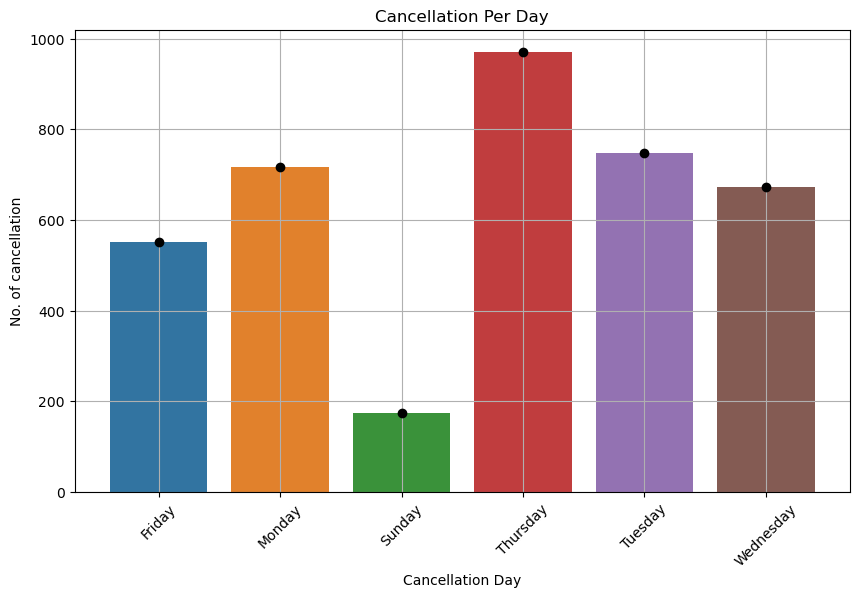

In [185]:
Can_per_week = can_data.groupby('Day_of_Purchase')['InvoiceNo'].nunique()
print(Can_per_week)

plt.figure(figsize=(10, 6))
sns.barplot(x=Can_per_week.index, y=Can_per_week.values)
for i, value in enumerate(Can_per_week.values):
    plt.plot(i, value, 'o', color='black')

plt.title('Cancellation Per Day')
plt.xlabel('Cancellation Day')
plt.ylabel('No. of cancellation')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Which country customers have cancelled most orders

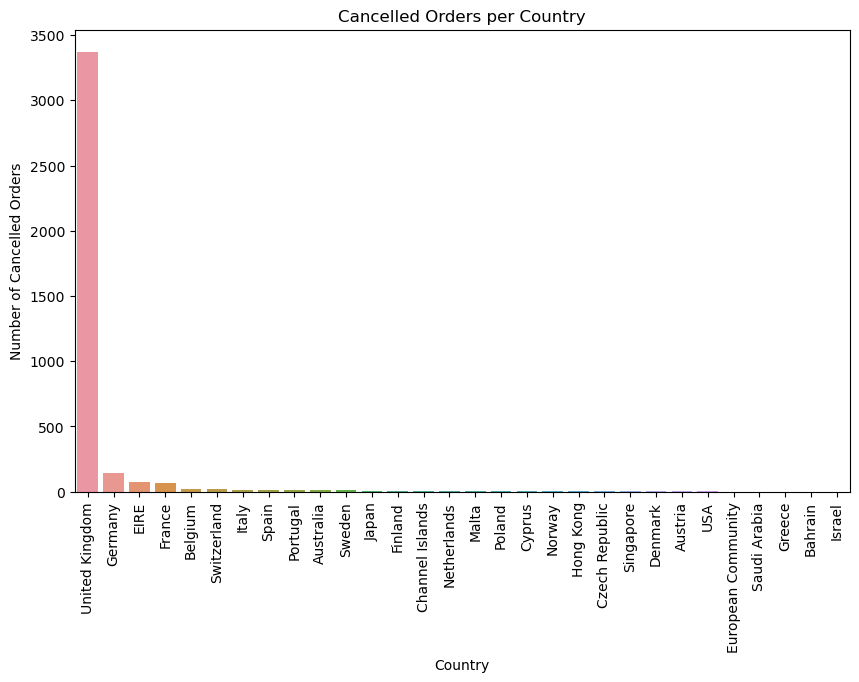

In [133]:
Can_per_country = can_data.groupby('Country')['InvoiceNo'].nunique()
Can_per_country1 = Can_per_country.sort_values( ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=Can_per_country1.index, y=Can_per_country1.values)
plt.xlabel('Country')
plt.ylabel('Number of Cancelled Orders')
plt.title('Cancelled Orders per Country')
plt.xticks(rotation=90)
plt.show()

#### Correlation

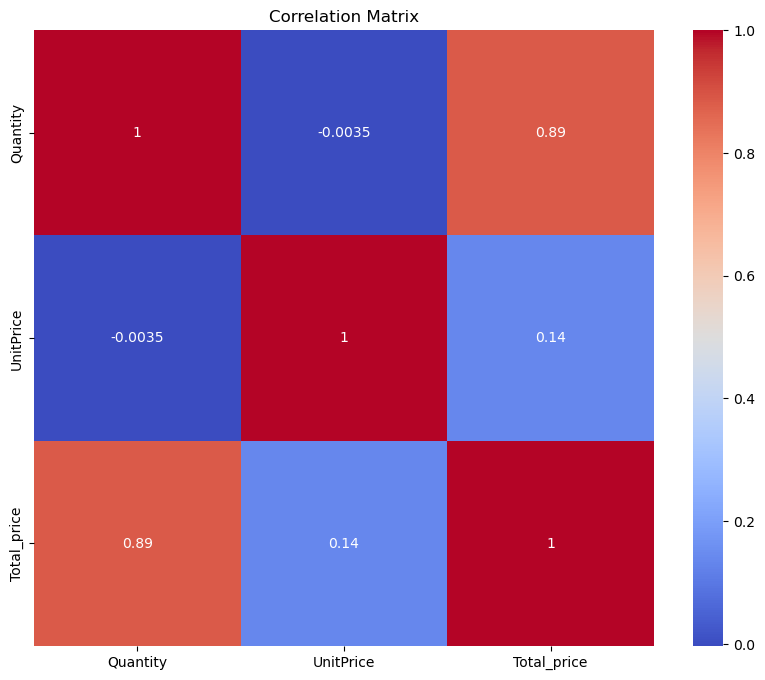

In [168]:
numeric_df = suc_data.select_dtypes(include='number')
numeric_df['Total_price'] = numeric_df['Quantity'] * numeric_df['UnitPrice']
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [167]:
numeric_df

,Quantity,UnitPrice
0,6,2.55
1,6,3.39
2,8,2.75
3,6,3.39
4,6,3.39
...,...,...
541904,12,0.85
541905,6,2.10
541906,4,4.15
541907,4,4.15


# Conclusion

#### • November records the highest sales, and Thursdays emerge as the peak sales day, with an unexpected absence of sales on      Saturdays.
#### •	The top products, ranked by total sales amount, include DOTCOM POSTAGE, REGENCY CAKESTAND 3 TIER, PAPER CRAFT, LITTLE BIRDIE, WHITE HANGING HEART T-LIGHT HOLDER, and PARTY BUNTING.
#### •	Customer IDs 14646, 18102, 17450, 16446 and 14911 are recognized as the top customers, determined by their purchase amounts.
#### •	The average order size among new customers is 278.52, whereas for existing customers, it stands at 1769.34.
#### •	In terms of country-wise purchases, the United Kingdom leads with the highest purchase, followed by the Netherlands, Eire, Germany, and France.
#### •	In terms of retention rate, November exhibits the highest rate at 38.37%, whereas January has the lowest rate at 17.07%.
#### •	The company incurred a loss of 893,979.73 as a result of cancelled or returned products.
#### •	November saw the highest number of orders being cancelled or returned, while December had the lowest.
#### •	The majority of cancelled or returned orders originated from the United Kingdom.
#### •	The correlation coefficient indicates that there is a relationship between the quantity of products ordered and the total price.